Define Library


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import sklearn


## Cleaning and Preparing data 


In [11]:
#train = pd.read_csv("train.csv")
#test  = pd.read_csv("test.csv") 

from google.colab import files
import pandas as pd

uploaded = files.upload()


train = pd.read_csv('train.csv')
train.head() 


Saving train.csv to train (1).csv


,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
print(train['cut'].unique())
print(train['color'].unique())
print(train['clarity'].unique())

['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
['I' 'G' 'F' 'H' 'D' 'E' 'J']
['SI2' 'VVS2' 'VS2' 'IF' 'VS1' 'SI1' 'VVS1' 'I1']


In [ ]:
zero_locations = train.isin([0]).sum()
zero_locations

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## A Histogram for each numeric data attribute

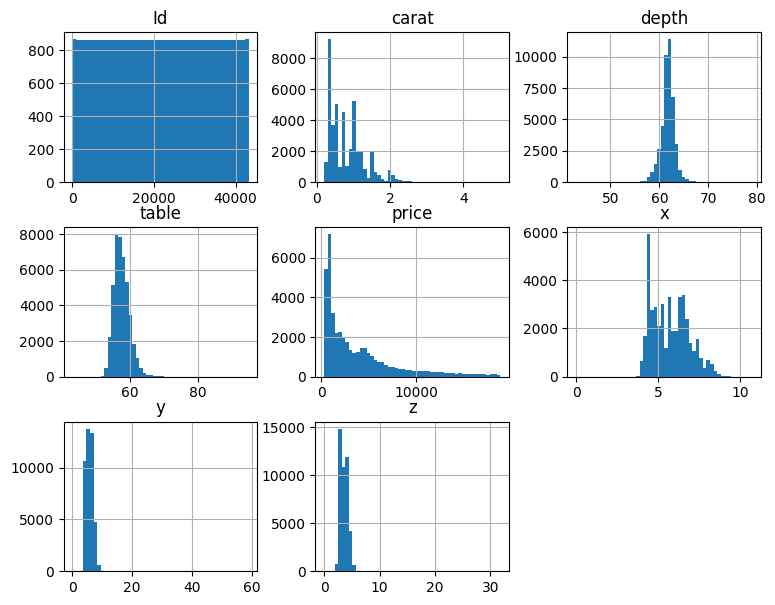

In [ ]:
train.hist(bins=50, figsize=(9, 7))
plt.show()



## The histogram and KDE provide a visual representation of the density and distribution of the 'price' variable.
# **As we can see the 'price' is right-skewed**

<ipython-input-24-1637a6bcb2c3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'])


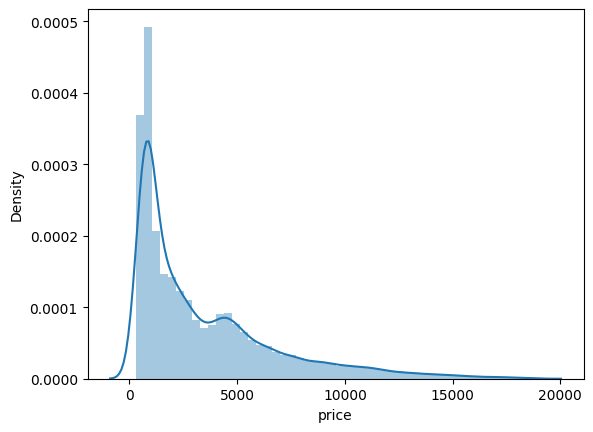

In [ ]:
sns.distplot(train['price'])

<Axes: xlabel='price', ylabel='depth'>

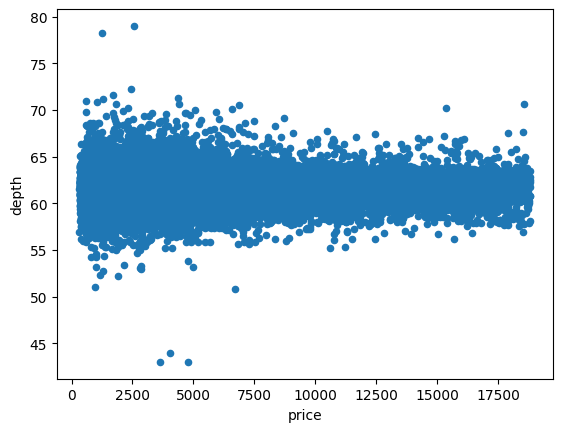

In [ ]:
train.plot(kind='scatter',x='price',y='depth')

<Axes: xlabel='price', ylabel='carat'>

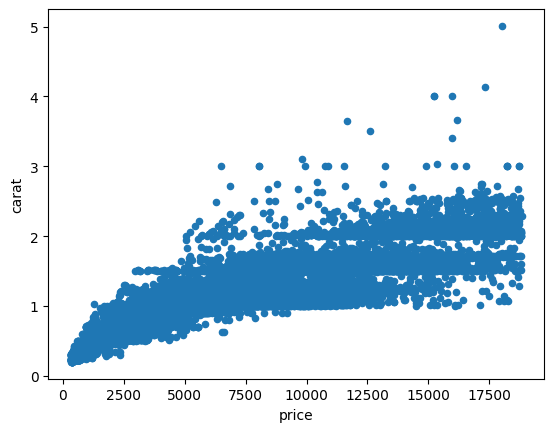

In [ ]:
train.plot(kind='scatter',x='price',y='carat')

<Axes: xlabel='price', ylabel='table'>

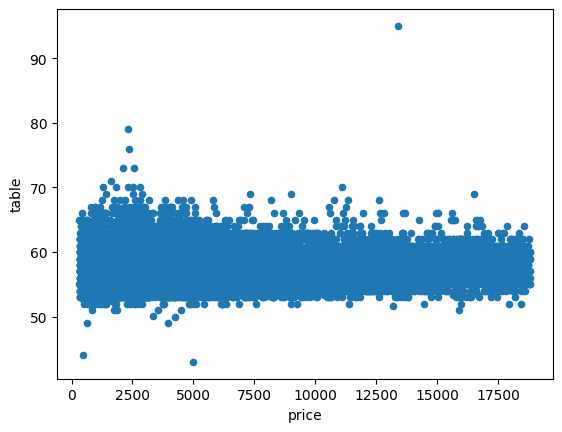

In [ ]:
train.plot(kind='scatter',x='price',y='table')

### command creates a matrix of scatter plots between all pairs of variables in the train dataset, where each plot shows the relationship between two variables. The hue argument is used to color the points by the cut variable, which represents the quality of the diamond cut.

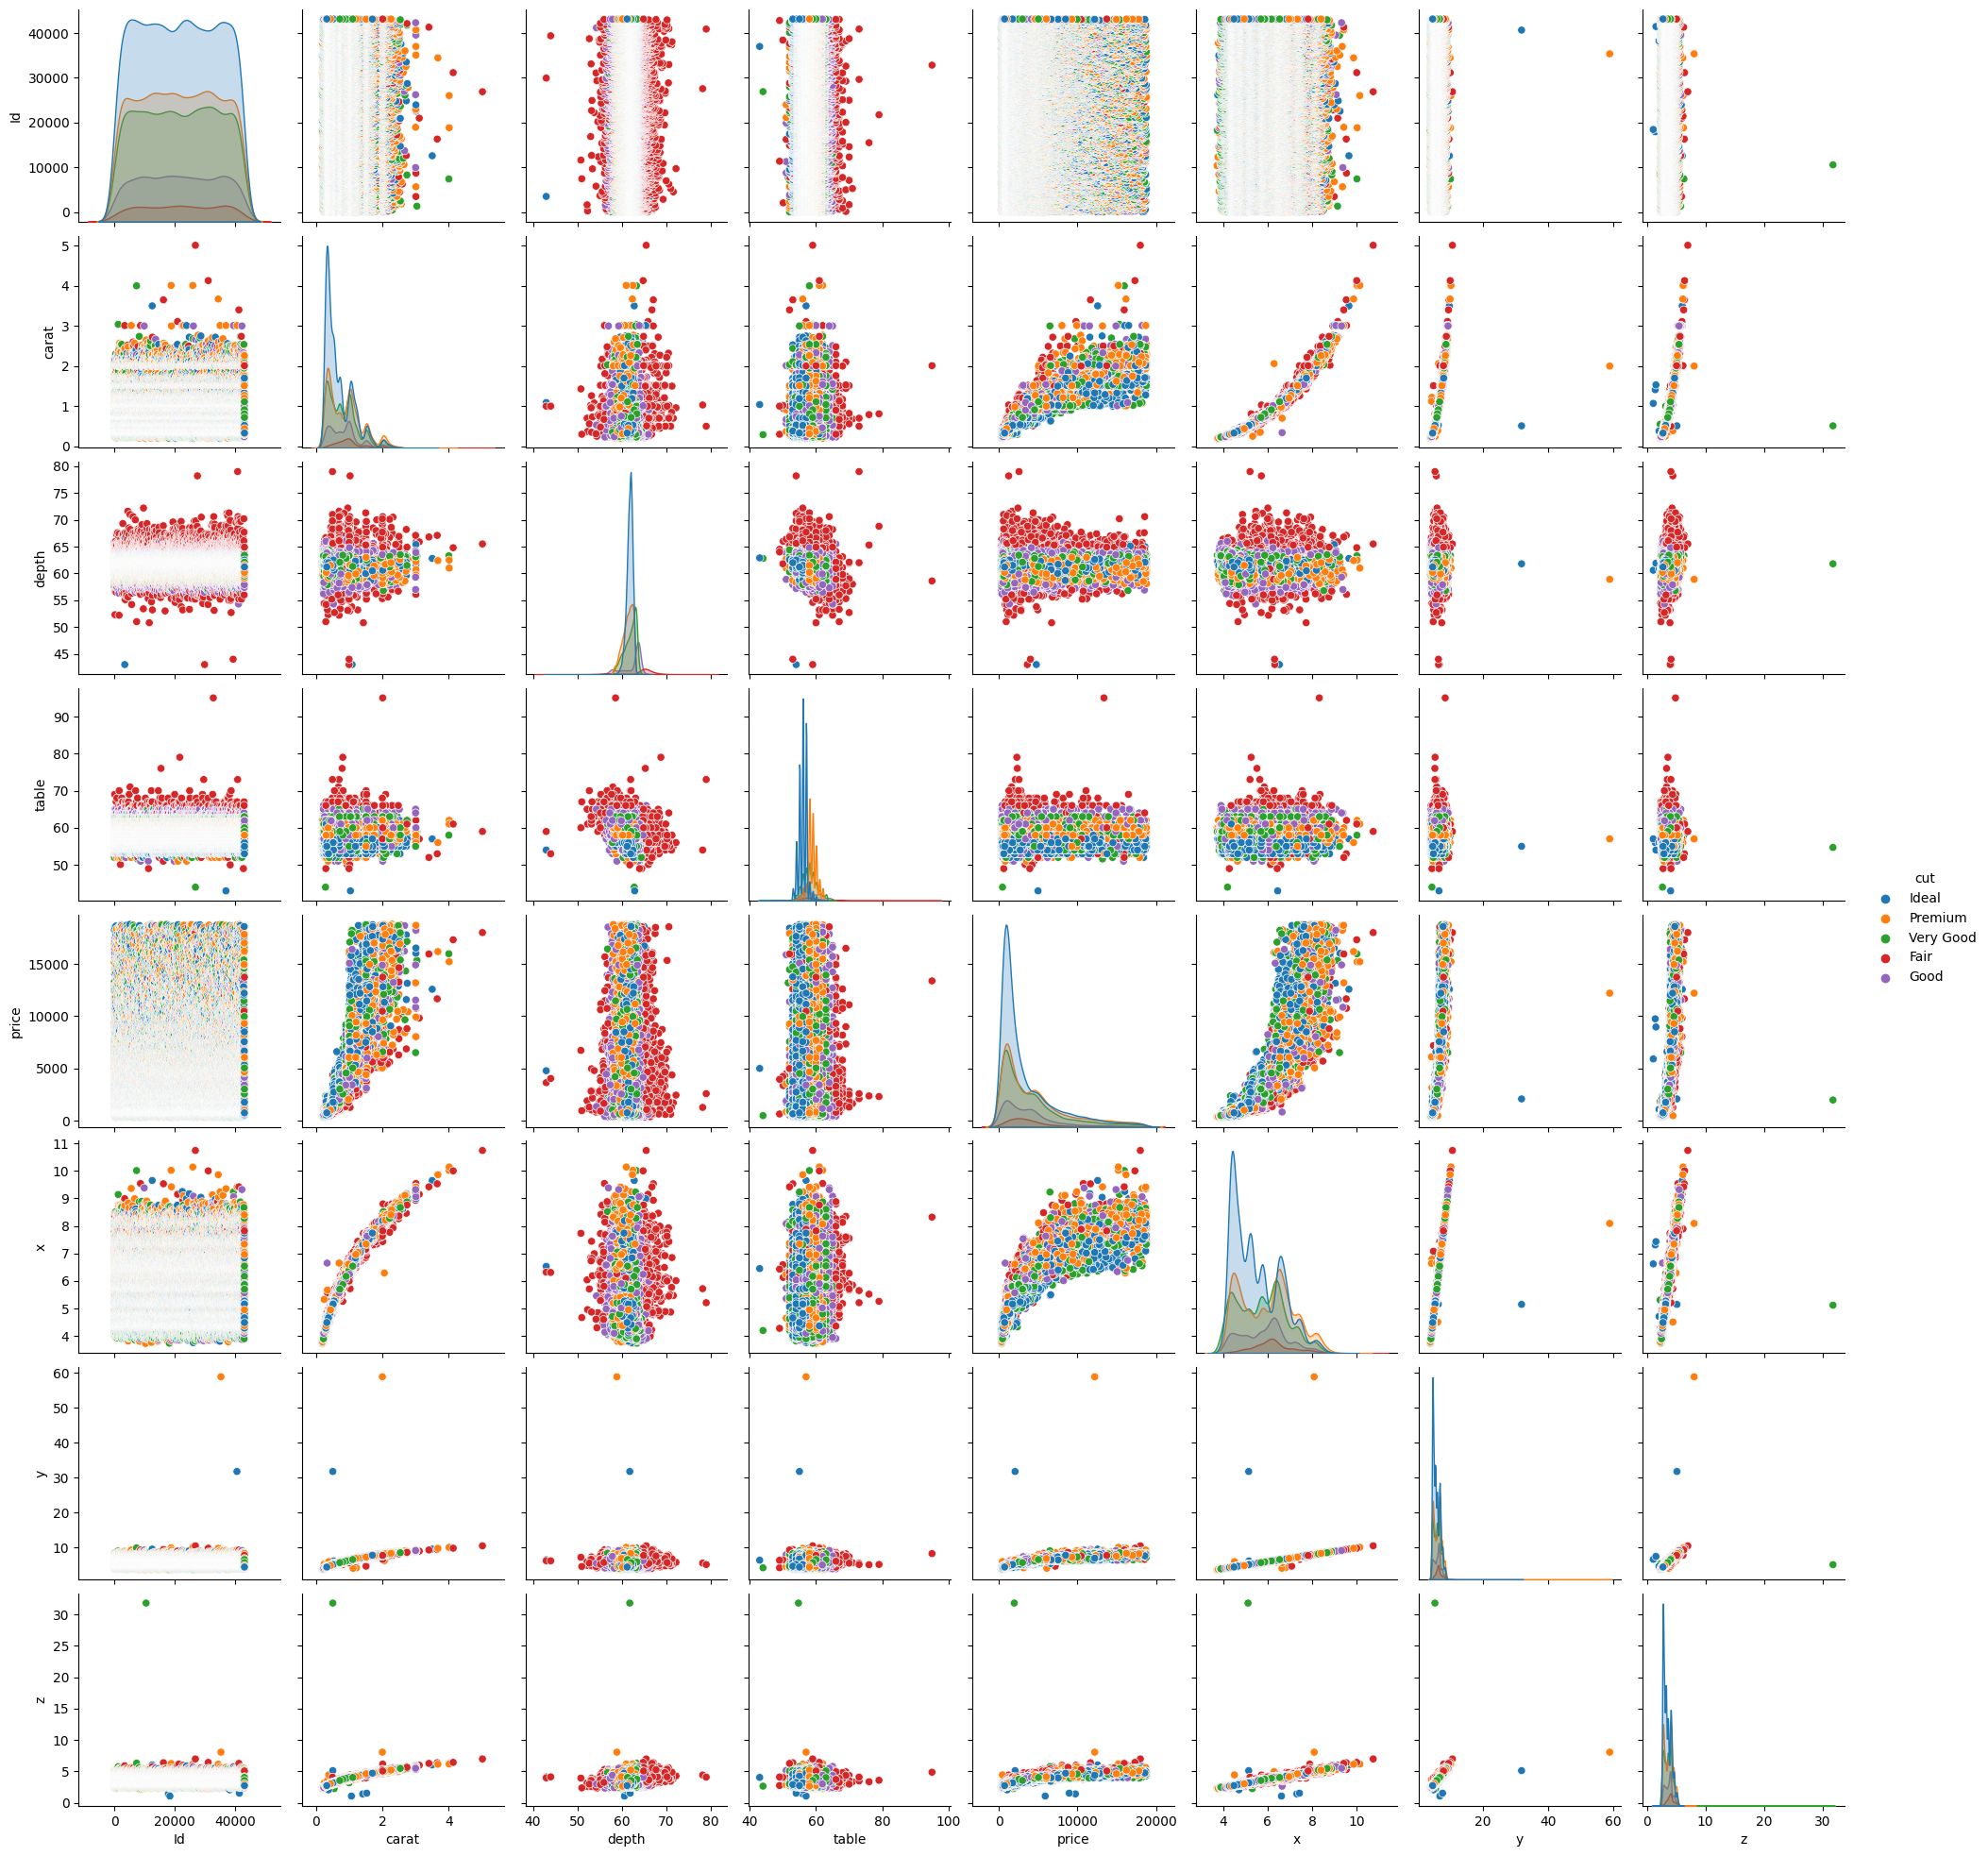

In [ ]:
sns.pairplot(train, hue="cut")

## The resulting Box plot will display the distribution of the 'price',and 'carat' values, including the median, quartiles, and any outliers.

<Axes: >

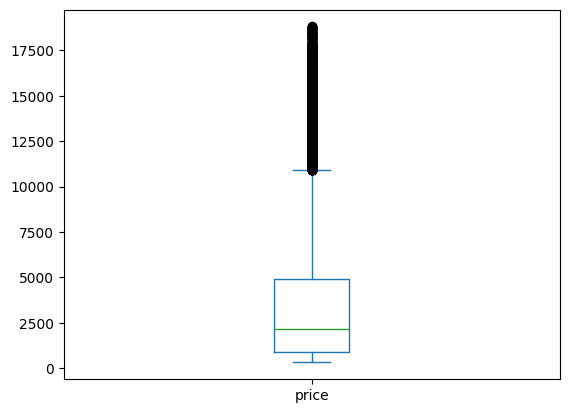

In [ ]:
train.price.plot.box()

<Axes: >

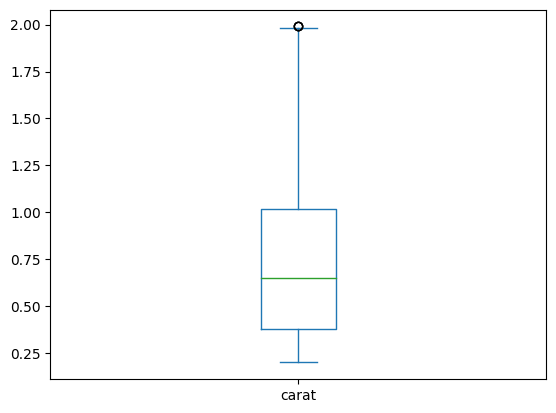

In [ ]:
train.carat.plot.box()

# Correlation is the statistical analysis of the relationship or dependency between two variables the correlation between two variables can range from -1 to 1.
## **As we can see the highest correlation based on the target variable is 'carat', and the lowest is 'depth'**

<ipython-input-182-4cf0354d58bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrleation=train.corr()


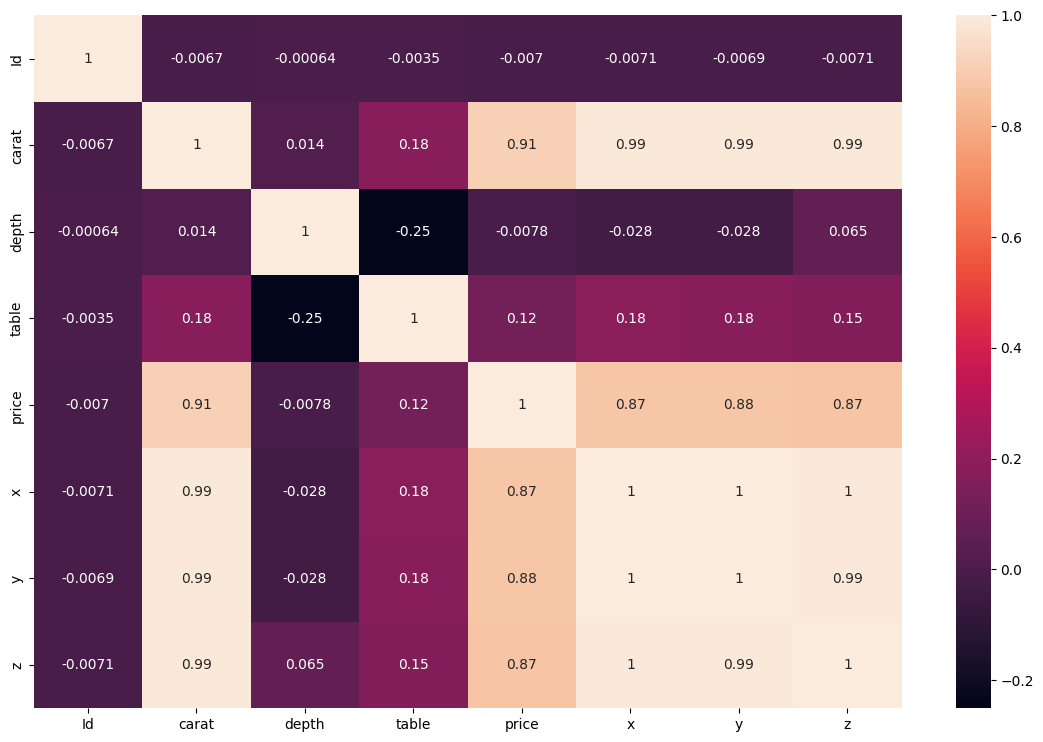

In [ ]:
corrleation=train.corr()

plt.figure(figsize=(14,9))
sns.heatmap(corrleation,annot=True)
plt.show()

## Features engineering

In [14]:
train = sklearn.utils.shuffle(train)
x = train.drop('price',axis =1)
y = train['price']

In [15]:
cut_class_dict = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
clarity_dict = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
color_dict = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}  



In [16]:
x['cut']      =x['cut'].map(cut_class_dict)
x['clarity']  =x['clarity'].map(clarity_dict)
x['color']    =x['color'].map(color_dict)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
diamonds_prepared = scaler.fit_transform(x)

In [18]:
x

,Id,carat,cut,color,clarity,depth,table,x,y,z
1368,1369,1.09,5,5,5,61.7,57.0,6.58,6.62,4.07
7870,7871,0.41,5,1,4,61.7,55.0,4.79,4.81,2.96
9885,9886,0.70,3,2,7,59.5,58.0,5.78,5.81,3.45
21221,21222,1.53,1,1,4,64.7,58.0,7.24,7.22,4.68
8809,8810,1.50,1,2,1,65.1,59.0,7.12,6.96,4.58
...,...,...,...,...,...,...,...,...,...,...
19971,19972,0.70,5,6,6,62.8,56.0,5.68,5.60,3.54
41589,41590,1.02,4,5,2,61.0,58.0,6.49,6.52,3.97
26831,26832,1.52,4,1,5,62.5,58.0,7.37,7.34,4.60
32763,32764,0.55,5,7,6,60.8,56.0,5.31,5.34,3.24


## Build A model

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
sklearn.utils.shuffle(diamonds_prepared)
X_train, X_test, y_train, y_test = train_test_split(diamonds_prepared,y,train_size=0.8,random_state=42)

In [27]:
def Train_for_best_accuracy():
  global r_squared,X_test,y_test,z,clf

  clf = RandomForestRegressor()
  clf.fit(X_train,y_train)
  r_squared = clf.score(X_test,y_test)
  print(r_squared)
  if r_squared < 0.85:
    z += 1
    Train_for_best_accuracy()

In [28]:
z = 0
Train_for_best_accuracy()

0.9820165000821264


In [29]:
for x,y in list(zip(X_test,y_test))[:10]:
  print(clf.predict([x])[0],'\t',y)

927.78 	 992
1285.96 	 1075
560.54 	 557
4787.13 	 4147
1014.29 	 1026
715.27 	 743
3736.73 	 3135
803.72 	 739
1877.64 	 1812
15551.68 	 14939


In [31]:
import numpy as np
pred_train = clf.predict(X_train)
r2_train = r2_score(pred_train, y_train)*100
mse_train = mean_squared_error(pred_train, y_train, squared = False)
rmse_train = np.sqrt(mse_train)
print("**** Training *****")
print("R2: ", r2_train)
print("RMSE: ", rmse_train)

**** Training *****
R2:  99.72598347026037
RMSE:  14.383484609845347


In [32]:
pred_validation = clf.predict(X_test)
r2_val = r2_score(pred_validation, y_test)*100
mse_val = mean_squared_error(pred_validation, y_test, squared = False)
rmse_val = np.sqrt(mse_val)
print("\n**** Validataion ****")
print("R2: ", r2_val)
print("RMSE: ", rmse_val)


**** Validataion ****
R2:  98.15088208688012
RMSE:  23.217341230369364


In [34]:
#train = pd.read_csv("train.csv")
#test  = pd.read_csv("test.csv") 

from google.colab import files
import pandas as pd

uploaded = files.upload()


test = pd.read_csv('test.csv')
test.head() 


Saving test.csv to test.csv


,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [35]:
print('cut : ',test['cut'].unique())
print('color : ',test['color'].unique())
print('clarity : ',test['clarity'].unique())

cut :  ['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
color :  ['G' 'E' 'I' 'F' 'D' 'H' 'J']
clarity :  ['VVS2' 'VS2' 'VS1' 'SI2' 'VVS1' 'SI1' 'IF' 'I1']


In [36]:
test['cut']      =test['cut'].map(cut_class_dict)
test['clarity']  =test['clarity'].map(clarity_dict)
test['color']    =test['color'].map(color_dict)

In [37]:
id = test['Id']
test = test.drop(['Id',],axis=1)

In [38]:
diamonds_prepared_test = scaler.fit_transform(test)

In [39]:
test.head()


,carat,cut,color,clarity,depth,table,x,y,z
0,0.34,5,4,6,61.1,57.0,4.52,4.48,2.75
1,0.71,4,6,4,62.7,58.0,5.74,5.68,3.58
2,0.44,3,2,5,62.8,56.0,4.83,4.88,3.05
3,0.81,4,6,2,60.1,59.0,6.09,6.03,3.65
4,0.40,5,4,7,61.2,56.0,4.74,4.80,2.92


In [ ]:
y_pred = clf.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
id = test['Id']
data={'Id': id, 'price':y_pred }
sub = pd.DataFrame(data=data)
sub.to_csv('sub1.csv',index=False)